# Importing Libraries

In [969]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [970]:
df=pd.read_csv('data/heart.xls')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Preprocessing

In [971]:
scaled_columns=['age','trestbps','chol','thalach','oldpeak'] # picking columns to scale

In [972]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[scaled_columns]=scaler.fit_transform(df[scaled_columns])

In [973]:
X= df.drop('target',axis=1)
y=df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2


# Splitting Dataset

In [974]:
X = df.drop('target',axis=1)
y = df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Decision Tree Classifier

## Training and Visualising Model

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      0.98      0.99       120

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



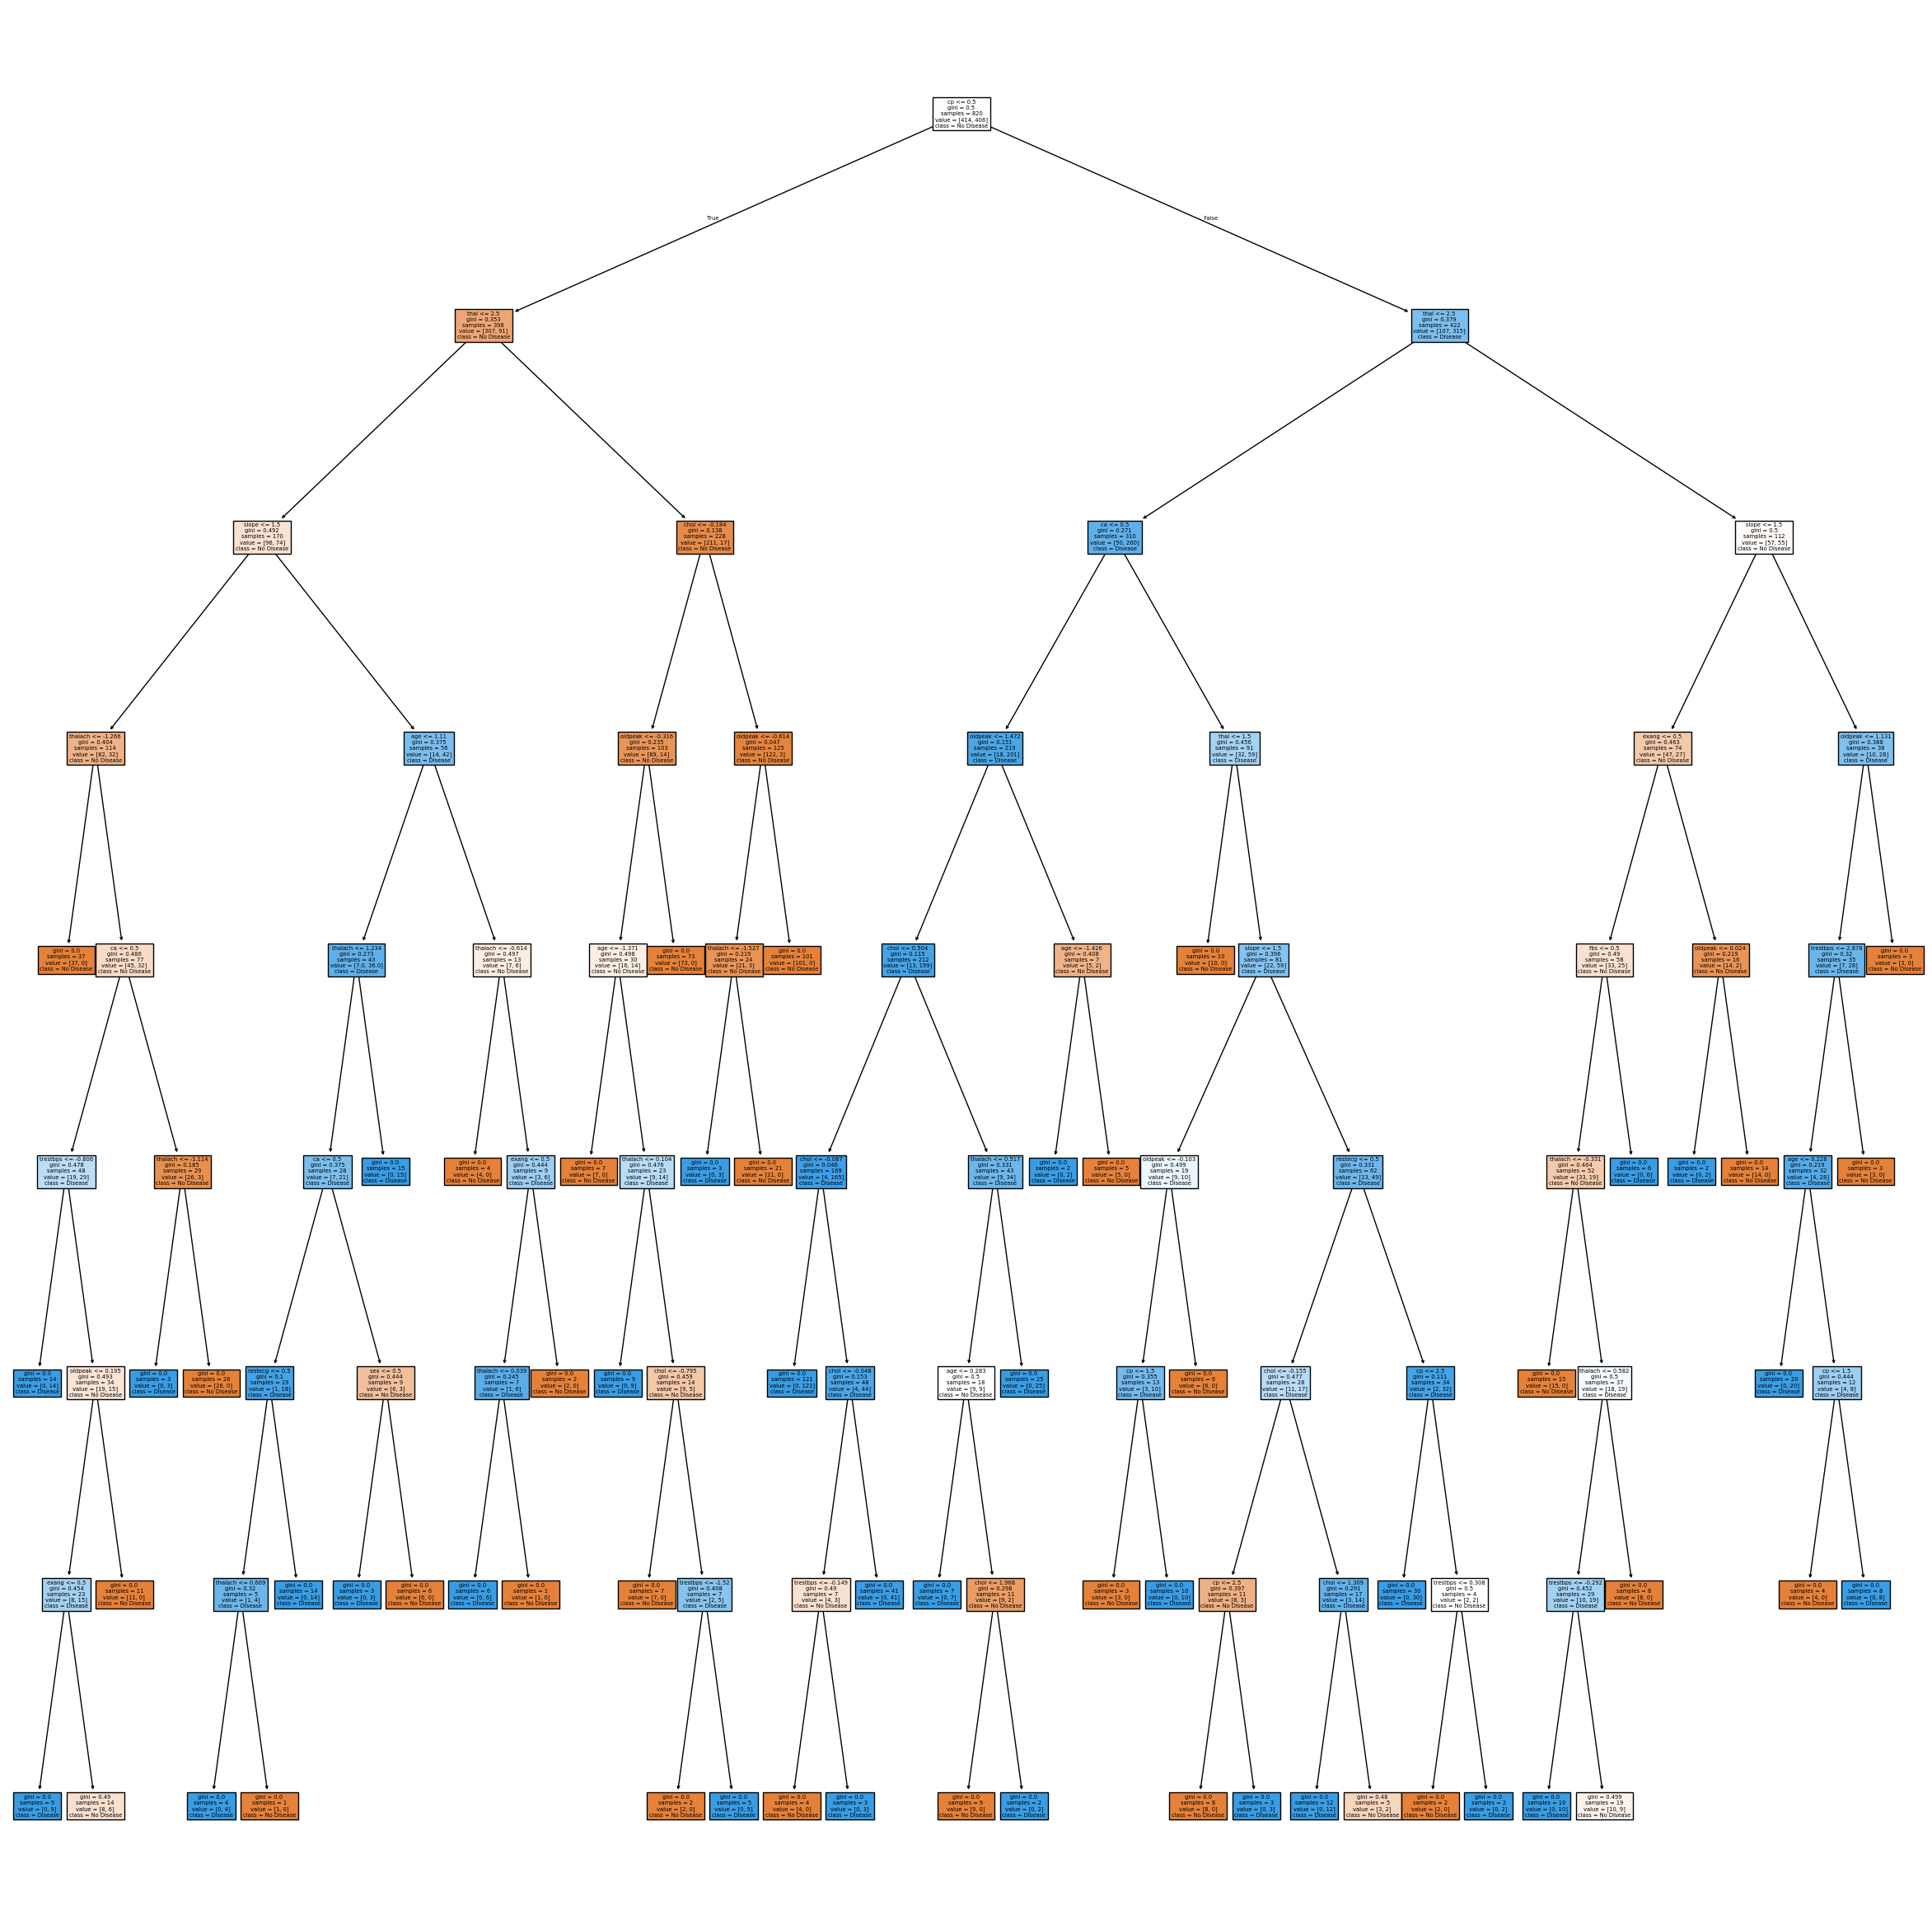

In [975]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(max_features=6,criterion="gini",max_depth=8) #putting optimal values after cross validation
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

classrep=classification_report(y_test,y_pred)
print(classrep)

plt.figure(figsize=(30,30))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

## Cross Validation and finding optimal parameters for Dtrees

In [976]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': [4, 6, 8, 10],
    'max_depth': [4,5, 6,7, 8,9, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X, y)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10}
Best CV Accuracy: 0.9960975609756098


# Random Forest Classifier

In [977]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
classrep_rf = classification_report(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {classrep_rf}")

Random Forest Accuracy:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00       120

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



## Cross Validation and finding optimal parameters
### For Random Forests

In [978]:
n_estimator_values = [10, 25, 40, 50]
cv_scores = []

for n in n_estimator_values:
    rf = RandomForestClassifier(n_estimators=n)
    scores = cross_val_score(rf, X, y, cv=5)
    cv_scores.append(scores.mean())
    print(f"n_estimators={n}, Mean CV Accuracy={scores.mean():.4f}")

n_estimators=10, Mean CV Accuracy=0.9902
n_estimators=25, Mean CV Accuracy=0.9941
n_estimators=40, Mean CV Accuracy=0.9971
n_estimators=50, Mean CV Accuracy=0.9971


## Feature Importances

In [979]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature Importances (Random Forest):")
for i in indices:
    print(f"{X.columns[i]}: {importances[i]:.4f}")


Feature Importances (Random Forest):
cp: 0.1585
thalach: 0.1336
ca: 0.1235
thal: 0.1036
oldpeak: 0.1000
age: 0.0811
chol: 0.0744
trestbps: 0.0740
slope: 0.0462
exang: 0.0403
sex: 0.0315
restecg: 0.0237
fbs: 0.0097
